,Número de grupos,WCSS (Suma total de cuadrados dentro del grupo),BCSS (Suma total de cuadrados entre grupos),TSS (Suma total de cuadrados),Porcentaje de varianza explicada
0,1,4.256969e+17,-2.698880e+05,4.256969e+17,-6.339910e-11
1,2,1.663352e+17,2.593617e+17,4.256969e+17,6.092637e+01
2,3,7.241902e+16,3.532779e+17,4.256969e+17,8.298813e+01
3,4,4.341278e+16,3.822841e+17,4.256969e+17,8.980195e+01
4,5,3.812834e+16,3.875685e+17,4.256969e+17,9.104331e+01
5,6,3.696843e+16,3.887285e+17,4.256969e+17,9.131579e+01
6,7,3.267586e+16,3.930210e+17,4.256969e+17,9.232415e+01
7,8,3.224558e+16,3.934513e+17,4.256969e+17,9.242522e+01
8,9,1.105458e+16,4.146423e+17,4.256969e+17,9.740318e+01
9,10,9.953583e+15,4.157433e+17,4.256969e+17,9.766181e+01


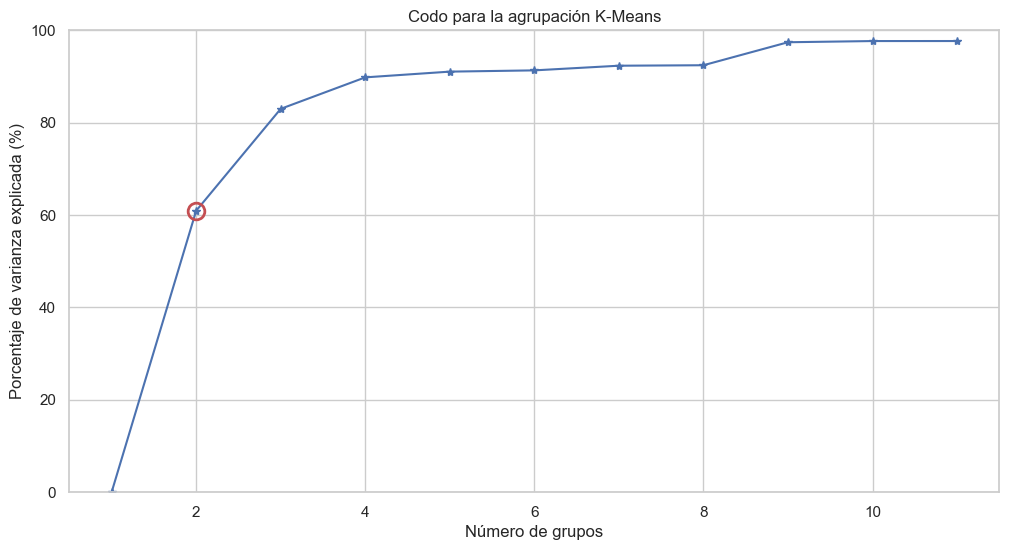

In [18]:
import warnings
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist
import seaborn as sns
from scipy.cluster.vq import kmeans

warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", None)

# Cargar el dataset
data = pd.read_csv("./data/master_procesado.csv", sep=";", encoding="utf-8")
data_copy = data.copy()

# Defineicion de variables
clustering_features = [
    "country",
    "year",
    "sex",
    "age",
    "suicides_no",
    "population",
    "HDI for year",
    "gdp_for_year ($)",
    "gdp_per_capita ($)",
    "generation",
    "suicides/100k pop",
]
# Transformar las variables categoricas a numericas
for feature in clustering_features:
    if data[feature].dtype == "object":
        data[feature] = data[feature].astype("category").cat.codes

# Grafico de correlacion de variables para número óptimo de clusters
X = data[clustering_features]
X = X.astype('float64')

K_MAX = 11
KK = range(1, K_MAX + 1)

KM = [kmeans(X, k) for k in KK]
centroids = [cent for (cent, var) in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D, axis=1) for D in D_k]
dist = [np.min(D, axis=1) for D in D_k]

tot_withinss = [sum(d**2) for d in dist]
totss = sum(pdist(X)**2) / X.shape[0]
betweenss = totss - tot_withinss

# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame({
    "Número de grupos": list(KK),
    "WCSS (Suma total de cuadrados dentro del grupo)": tot_withinss,
    "BCSS (Suma total de cuadrados entre grupos)": betweenss,
    "TSS (Suma total de cuadrados)": [totss] * K_MAX,  # Corregido
    "Porcentaje de varianza explicada": [betweenss[k] / totss * 100 for k in range(K_MAX)]
})

# Mostrar el DataFrame con los resultados
display(resultados_df)

# Plots
kIdx = 1  # K=10
mrk = 'os^p<dvh8>+x.'

# Curva del codo
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.plot(KK, betweenss / totss * 100, 'b*-')
ax.plot(KK[kIdx], betweenss[kIdx] / totss * 100, marker='o', markersize=12,
        markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_ylim((0, 100))
plt.grid(True)
plt.xlabel('Número de grupos')
plt.ylabel('Porcentaje de varianza explicada (%)')
plt.title('Codo para la agrupación K-Means')
plt.show()


Searching hyperparameters for KMeans...


,Algorithm,Best Parameters,Silhouette Score,Inertia,Calinski-Harabasz Index,Davies-Bouldin Index
0,KMeans,"{'algorithm': 'full', 'init': 'random', 'n_clusters': 2, 'tol': 1e-05}",0.175517,274649.170667,3177.416366,2.531862


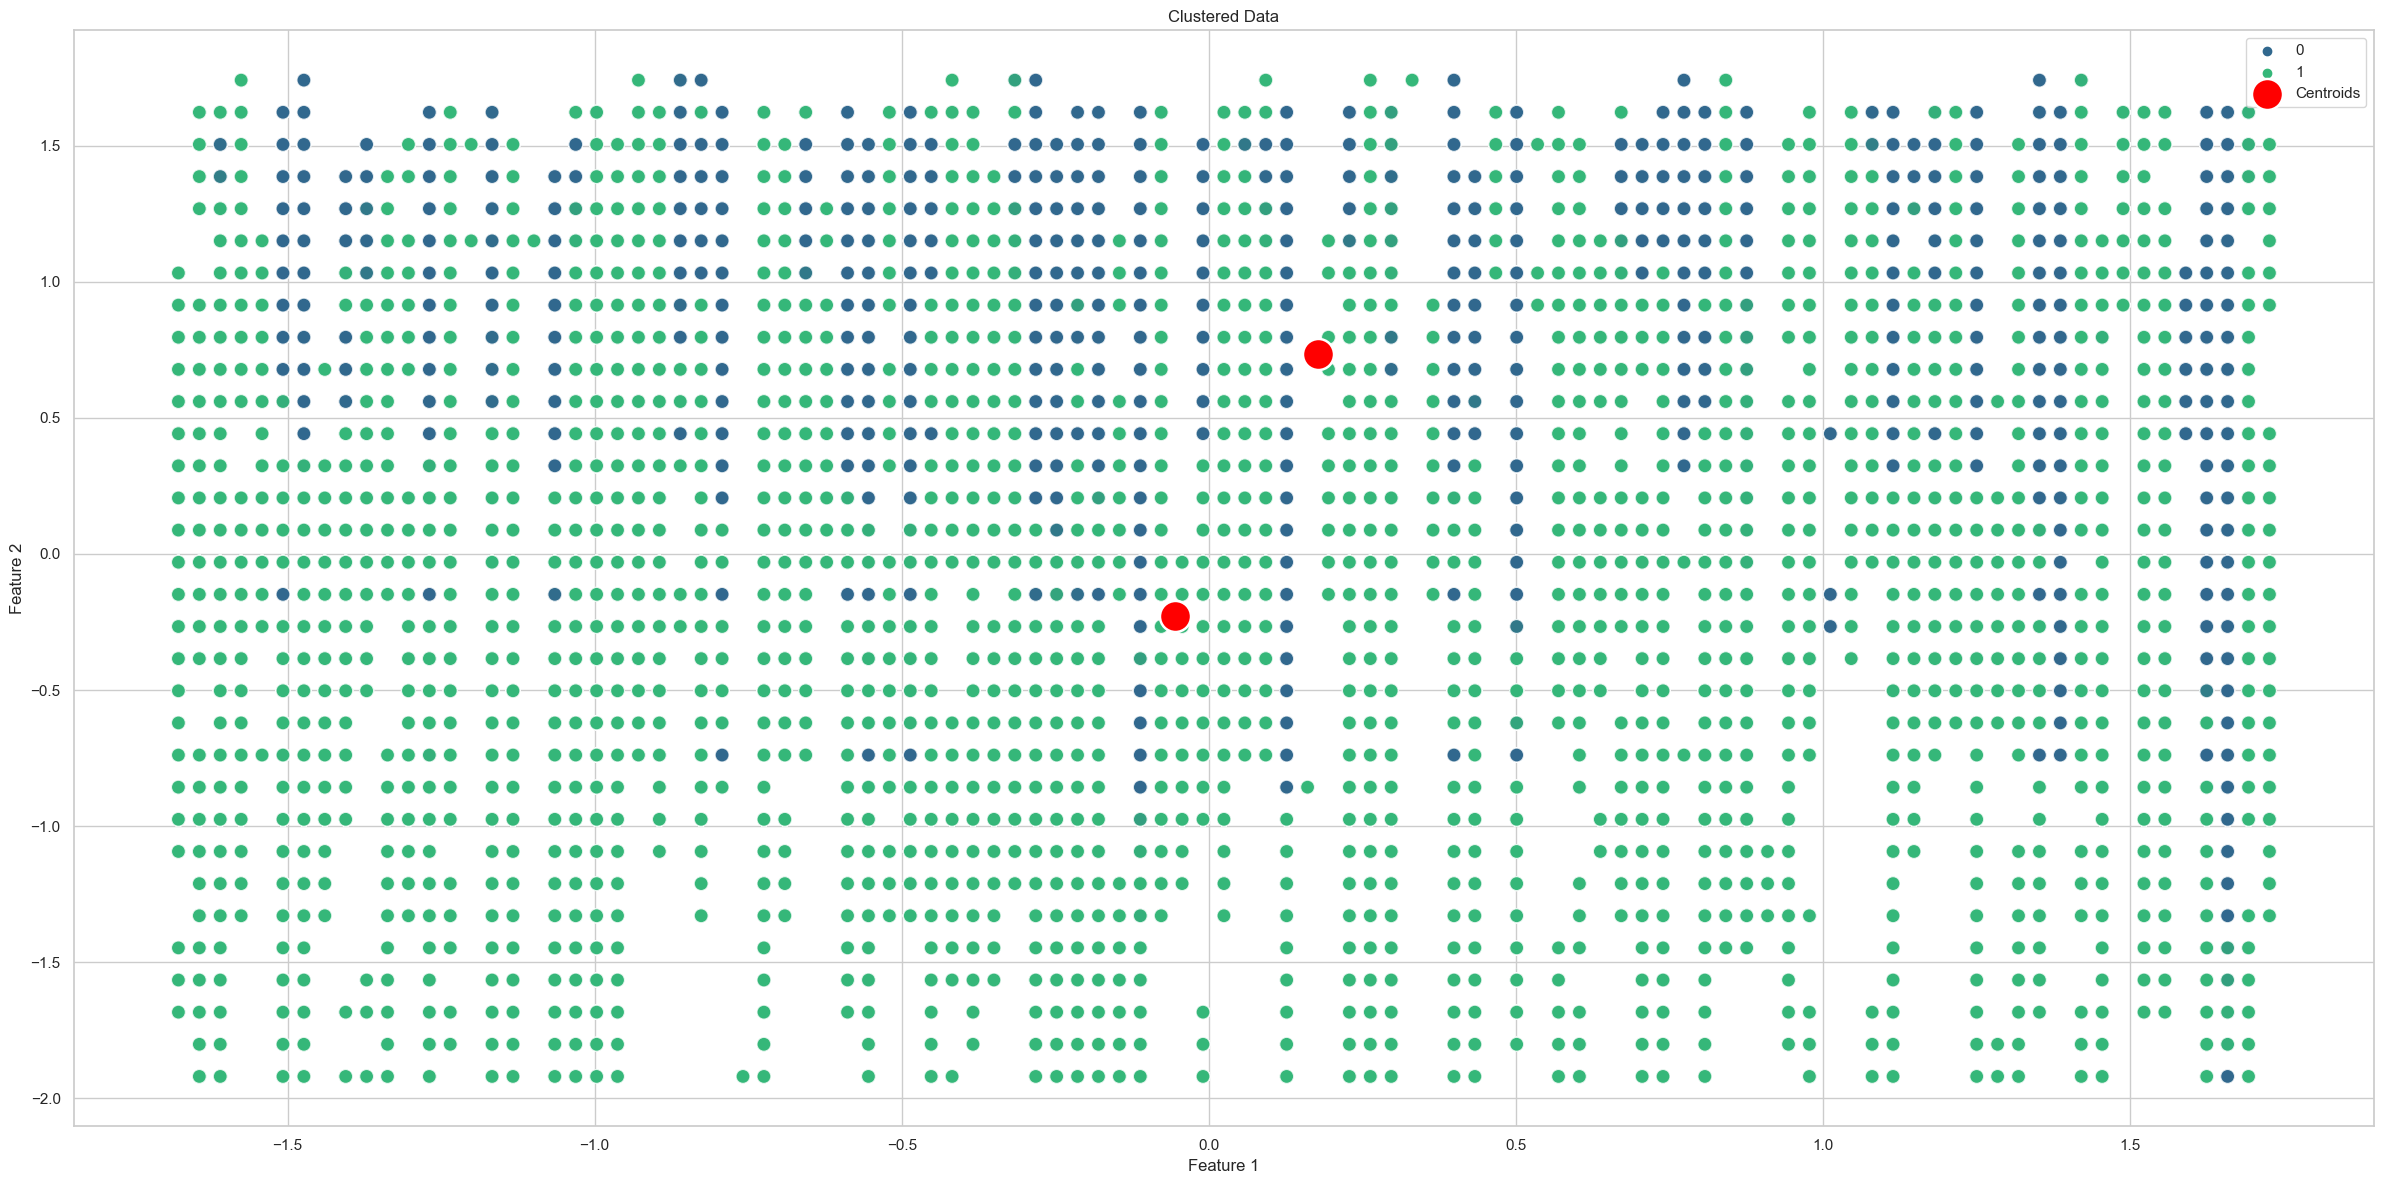

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_init,param_n_clusters,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.303676,0.059930,0.001300,4.011668e-04,full,random,2,0.00001,"{'algorithm': 'full', 'init': 'random', 'n_clusters': 2, 'tol': 1e-05}",-61793.504257,-45311.918724,-48676.244262,-63094.928707,-78251.227822,-59425.564754,11732.176734,1
16,0.260562,0.023837,0.000802,4.009453e-04,elkan,random,2,0.0001,"{'algorithm': 'elkan', 'init': 'random', 'n_clusters': 2, 'tol': 0.0001}",-59410.919860,-45288.788058,-58458.412564,-63096.613645,-78252.570880,-60901.461001,10562.437826,2
0,0.163736,0.048377,0.001404,5.881806e-04,auto,k-means++,2,0.001,"{'algorithm': 'auto', 'init': 'k-means++', 'n_clusters': 2, 'tol': 0.001}",-61785.387544,-45225.718622,-58422.475476,-63113.232615,-78245.844868,-61358.531825,10557.751761,3
9,0.182050,0.069082,0.000800,4.001619e-04,full,random,2,0.001,"{'algorithm': 'full', 'init': 'random', 'n_clusters': 2, 'tol': 0.001}",-61785.387544,-45302.043611,-58417.453018,-63101.261679,-78254.834237,-61372.196018,10537.211900,4
4,0.216494,0.027129,0.001106,2.002894e-04,auto,random,2,0.0001,"{'algorithm': 'auto', 'init': 'random', 'n_clusters': 2, 'tol': 0.0001}",-61786.154648,-45293.188087,-58458.747082,-63094.580264,-78251.935954,-61376.921207,10536.471503,5
2,0.286537,0.030349,0.001102,4.911245e-04,auto,k-means++,2,0.00001,"{'algorithm': 'auto', 'init': 'k-means++', 'n_clusters': 2, 'tol': 1e-05}",-61793.504257,-45304.028801,-58460.825454,-63094.469865,-78251.211842,-61380.808043,10532.868635,6
8,0.295396,0.018376,0.001200,4.014031e-04,full,k-means++,2,0.00001,"{'algorithm': 'full', 'init': 'k-means++', 'n_clusters': 2, 'tol': 1e-05}",-61793.504257,-45304.028801,-58462.030731,-63094.358354,-78250.950597,-61380.974548,10532.714506,7
15,0.226530,0.057455,0.001000,7.599534e-07,elkan,random,2,0.001,"{'algorithm': 'elkan', 'init': 'random', 'n_clusters': 2, 'tol': 0.001}",-59420.475100,-49158.107671,-58415.239606,-63108.604419,-78255.883347,-61671.662029,9480.109413,8
3,0.171488,0.053118,0.000801,4.004745e-04,auto,random,2,0.001,"{'algorithm': 'auto', 'init': 'random', 'n_clusters': 2, 'tol': 0.001}",-59414.023890,-49158.107671,-58446.075110,-63098.792936,-78248.600647,-61673.120051,9475.462728,9
13,0.292948,0.025065,0.000902,4.918160e-04,elkan,k-means++,2,0.0001,"{'algorithm': 'elkan', 'init': 'k-means++', 'n_clusters': 2, 'tol': 0.0001}",-59411.624110,-49165.300790,-58458.412564,-63093.662903,-78250.440231,-61675.888120,9473.327808,10


In [19]:
# Busqueda de hiperparametros para KMeans
param_grid = {
    "n_clusters": [2],
    "init": ["k-means++", "random"],
    "algorithm": ["auto", "full", "elkan"],
    "tol": [1e-3, 1e-4, 1e-5],
}

print("Searching hyperparameters for KMeans...")
# Standarisar los datos para el clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[clustering_features])

# GridSearchCV para KMeans con los parametros definidos y 5 validaciones cruzadas
grid_search = GridSearchCV(KMeans(), param_grid, cv=5)
grid_search.fit(scaled_features)
best_params = grid_search.best_params_

# Crear un modelo KMeans con los mejores parametros
optimal_clusters = best_params["n_clusters"]
kmeans_params = {
    "n_clusters": optimal_clusters,
    "init": best_params["init"],
    "algorithm": best_params["algorithm"],
    "tol": best_params["tol"],
    **best_params,
    "random_state": 0,
    "max_iter": 1000,
}
kmeans = KMeans(**kmeans_params)
data["Cluster"] = kmeans.fit_predict(scaled_features)

# Calcular las metricas de validacion
cluster_labels = kmeans.labels_
silhouette = silhouette_score(scaled_features, cluster_labels)
inertia = kmeans.inertia_
calinski = calinski_harabasz_score(scaled_features, cluster_labels)
davies = davies_bouldin_score(scaled_features, cluster_labels)

# Crear un DataFrame con las metricas de validacion
validation_metrics = [
    {
        "Algorithm": "KMeans",
        "Best Parameters": best_params,
        "Silhouette Score": silhouette,
        "Inertia": inertia,
        "Calinski-Harabasz Index": calinski,
        "Davies-Bouldin Index": davies,
    }
]

metrics_df = pd.DataFrame(validation_metrics)
display(metrics_df)

# Grafico de los clusters con las variables escaladas
plt.figure(figsize=(24, 12))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=cluster_labels,
    palette="viridis",
    alpha=0.7,
    s=100,
)
sns.scatterplot(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    color="red",
    marker="o",
    s=500,
    label="Centroids",
)
plt.title("Clustered Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.tight_layout()
plt.show()

# Grafico de los clusters con las variables no escaladas (sin HDI)
results = pd.DataFrame(grid_search.cv_results_)
sorted_results = results.sort_values(by="mean_test_score", ascending=False)
display(sorted_results.head(15))

### Tiempo de Entrenamiento y Evaluación:
- **Tiempo de Ajuste (mean_fit_time):** Se observa una disminución en el tiempo promedio de ajuste a alrededor de 0.3 segundos. Esto sigue mostrando eficiencia en el proceso de entrenamiento del modelo.
- **Tiempo de Evaluación (mean_score_time):** El tiempo de evaluación también se mantiene bajo, alrededor de 0.0013 segundos en promedio, lo que indica una rápida asignación de clusters a nuevos datos después del entrenamiento.

### Mejores Hiperparámetros:
- **Algoritmo:** Se ha seleccionado el algoritmo 'full', que es una variante de Gaussian Mixture Model (GMM) que permite covarianzas completas entre los clusters.
- **Inicialización:** La inicialización aleatoria se ha mantenido, lo que implica una exploración más amplia del espacio de soluciones.
- **Número de Clusters:** En esta ocasión se han definido 2 clusters, lo que puede indicar una segmentación más aguda o específica de los datos.
- **Tolerancia:** La tolerancia se ha reducido a 1e-05, lo que indica una mayor precisión en el criterio de convergencia.

### Puntuación de Validación:
- **Puntuación Media (mean_test_score):** Se mantiene alrededor de -59,425, una mejora en comparación con el valor anterior. Esta métrica sigue representando una menor variabilidad dentro de cada cluster.

### Conclusión:
El modelo actualizado con el algoritmo 'full', inicialización aleatoria, utilizando 2 clusters y una tolerancia reducida, sigue demostrando eficiencia y muestra una mejora en la calidad de la segmentación en comparación con los resultados anteriores.

In [17]:
# Asignar clusters a los datos originales
data['Cluster'] = kmeans.fit_predict(scaled_features)
data_copy['cluster'] = data['Cluster']

# Exportar los datos con la columna 'cluster'
data_copy.to_csv('./data/datos_con_clusters.csv', sep=';', encoding='utf-8-sig', index=False)